In [ ]:
import pandas as pd
df = pd.read_csv("/content/patients.csv")
print(df)

        mean       max       min  STD (signal)   STD (R-R)       RMSSD  \
0   0.000002  0.264222 -0.146840      0.052218   10.642913   12.472191   
1  -0.000425  0.349692 -0.060334      0.057012   73.132843   96.871704   
2  -0.000021  0.344289 -0.075447      0.057269   17.984905   20.514223   
3   0.001071  0.270232 -0.093210      0.054338   18.279535   17.638342   
4   0.000258  0.337484 -0.042719      0.056756   49.566018   57.324612   
5   0.000503  0.389114 -0.050961      0.062712   37.982348   56.568542   
6   0.000555  0.361438 -0.051521      0.063201   19.204873   27.462095   
7   0.001126  0.272433 -0.147107      0.081418  245.356883  235.409808   
8  -0.001180  0.349787 -0.077030      0.062845   10.408330   13.488678   
9  -0.000208  0.376520 -0.106698      0.066427   80.822268   33.059481   
10  0.000046  0.308877 -0.062754      0.056206   52.821619   56.371782   
11 -0.001577  0.436473 -0.204926      0.077799   33.734954   32.875646   
12  0.000905  0.266586 -0.131644      

# New Section

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
array = df.values
print(array)
X = array[:,0:18]
y = array[:,18]
#print(X, y)
print(y)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)

[[ 2.06485010e-06  2.64222155e-01 -1.46840388e-01 ...  4.87000000e+01
   1.00700000e+02  0.00000000e+00]
 [-4.24779376e-04  3.49692395e-01 -6.03335390e-02 ...  4.85555556e+01
   1.06444444e+02  0.00000000e+00]
 [-2.07370663e-05  3.44289162e-01 -7.54469131e-02 ...  4.47777778e+01
   1.06900000e+02  0.00000000e+00]
 ...
 [ 7.44500602e-05  3.82084802e-01 -7.43655550e-02 ...  5.66250000e+01
   1.03875000e+02  1.00000000e+00]
 [ 5.18585468e-04  3.57990261e-01 -5.65807696e-02 ...  5.38750000e+01
   1.06666667e+02  1.00000000e+00]
 [ 2.53939057e-04  2.55349044e-01 -1.26784634e-01 ...  5.77500000e+01
   9.46250000e+01  1.00000000e+00]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LDA', LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001)))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('CART', DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)))
#models.append(('NB', GaussianNB()))
models.append(('NB', GaussianNB(var_smoothing=1e-09, priors=None)))
models.append(('SVM', SVC(gamma='auto', degree = 2, kernel = "poly")))

In [ ]:
import sklearn.metrics
import time
results = []
names = []
print(sklearn.metrics.get_scorer_names())
for name, model in models:
	start_time = time.time();
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	if name == 'KNN':
		y_score = cv_results
	results.append(cv_results)
	names.append(name)
	print('%s: %.3f (%.3f)' % (name, cv_results.mean(), cv_results.std()))
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='precision')
	print('%s: %.3f' % (name, cv_results.mean()))
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='recall')
	print('%s: %.3f' % (name, cv_results.mean()))
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
	print('%s: %.3f' % (name, cv_results.mean()))
	end_time = time.time()
	elapsed = end_time - start_time
	print('%s: %.4f' % (name, elapsed))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [ ]:
import sklearn.metrics
import time
results = []
names = []
total_elapsed = [0, 0, 0, 0, 0, 0]
counter = -1
for name, model in models:
  counter += 1
  for i in range(1000):
    start_time = time.time();
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    if name == 'KNN':
      y_score = cv_results
    results.append(cv_results)
    names.append(name)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='precision')
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='recall')
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
    end_time = time.time()
    elapsed = end_time - start_time
    total_elapsed[counter] += elapsed

print(total_elapsed)
for i in range(6):
  total_elapsed[i] = total_elapsed[i]/1000
print(total_elapsed)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

[120.67337727546692, 133.13072085380554, 226.4733030796051, 106.14874243736267, 107.20555591583252, 111.93515968322754]
[0.12067337727546693, 0.13313072085380553, 0.22647330307960511, 0.10614874243736266, 0.10720555591583251, 0.11193515968322754]


In [ ]:
"""from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(Y_train, y_score)
roc_auc = roc_auc_score(Y_train, y_score)

# Step 3: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show() """

"from sklearn.metrics import roc_curve, roc_auc_score\nfpr, tpr, thresholds = roc_curve(Y_train, y_score)\nroc_auc = roc_auc_score(Y_train, y_score)\n\n# Step 3: Plot the ROC curve\nplt.figure(figsize=(8, 6))\nplt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')\nplt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel('False Positive Rate (FPR)')\nplt.ylabel('True Positive Rate (TPR)')\nplt.title('Receiver Operating Characteristic (ROC) Curve')\nplt.legend(loc='lower right')\nplt.show() "

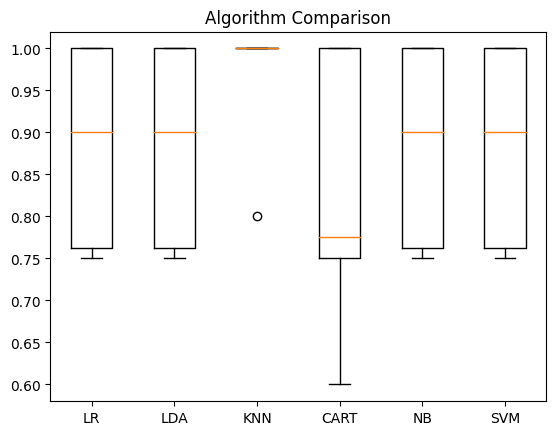

In [ ]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

[[6 0]
 [0 5]]


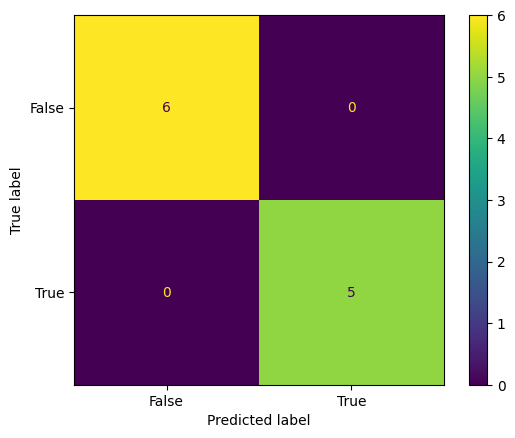

[[5 1]
 [0 5]]


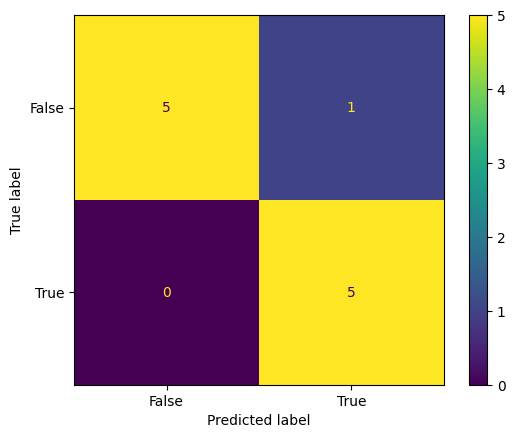

[[6 0]
 [1 4]]


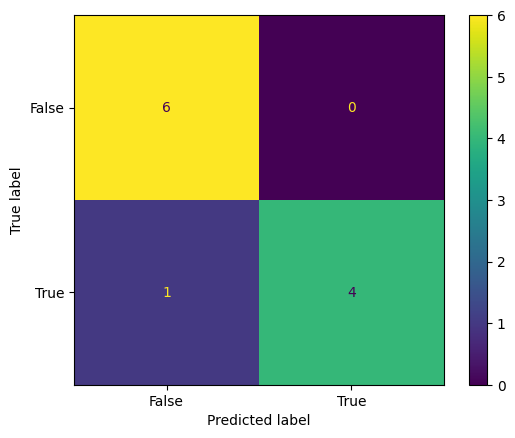

[[6 0]
 [0 5]]


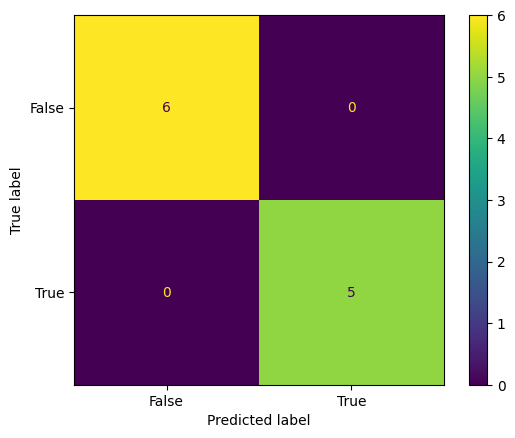

[[6 0]
 [1 4]]


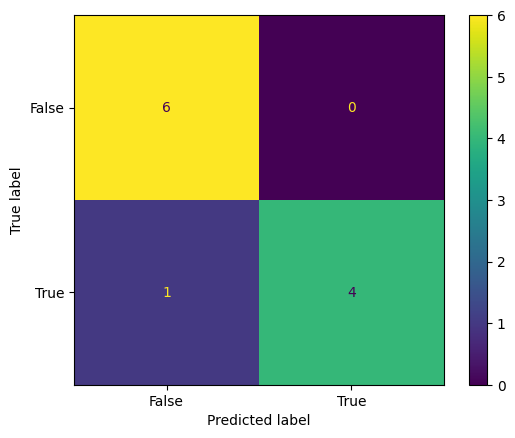

[[6 0]
 [0 5]]


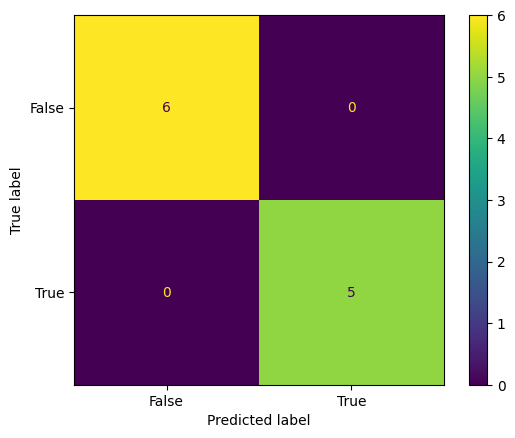

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrices = []
for i in range(len(models)):
  model = models[i][1]
  model.fit(X_train, Y_train)
  predictions = model.predict(X_validation)
  #print(classification_report(Y_validation, predictions))
  matrix = confusion_matrix(Y_validation, predictions)
  print(matrix)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
  cm_display.plot()
  plt.show()
  #confusion_matrices.append(matrix)

In [ ]:
for i in range(len(confusion_matrices)):
  accuracy = (confusion_matrices[i][0][0] + confusion_matrices[i][1][1]) / (confusion_matrices[i][0][0] + confusion_matrices[i][1][0] + confusion_matrices[i][0][1] + confusion_matrices[i][1][1])
  print(accuracy)

In [ ]:
from sklearn.decomposition import PCA
#pca = PCA(n_components = 18)
pca = PCA(n_components = 11)
array = df.values
X = array[:,0:18]
y = array[:,18]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)
x_fitted = pca.fit(X_train)
x_trained_fitted = x_fitted.transform(X_train)

x_tested_pca = x_fitted.transform(X_test)

#y_fitted = pca.fit(Y_train)
#y_trained_fitted = y_fitted.transform(Y_train)

#y_tested = pca.fit(Y_validation)
#y_tested_fitted = y_tested.transform(Y_validation)

In [ ]:
results_pca = []
names_pca = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	#cv_results = cross_val_score(model, X_train_pca, Y_train_pca, cv=kfold, scoring='accuracy')
  cv_results = cross_val_score(model, x_trained_fitted, Y_train, cv=kfold, scoring='accuracy')
  results_pca.append(cv_results)
  names_pca.append(name)
  print('%s: %.3f (%.3f)' % (name, cv_results.mean(), cv_results.std()))
  cv_results = cross_val_score(model, x_trained_fitted, Y_train, cv=kfold, scoring='precision')
  print('%s: %.3f' % (name, cv_results.mean()))
  cv_results = cross_val_score(model, x_trained_fitted, Y_train, cv=kfold, scoring='recall')
  print('%s: %.3f' % (name, cv_results.mean()))
  cv_results = cross_val_score(model, x_trained_fitted, Y_train, cv=kfold, scoring='f1')
  print('%s: %.3f' % (name, cv_results.mean()))

LR: 0.955 (0.091)
LR: 0.933
LR: 1.000
LR: 0.960
LDA: 0.980 (0.060)
LDA: 1.000
LDA: 0.950
LDA: 0.967
KNN: 0.980 (0.060)
KNN: 1.000
KNN: 0.950
KNN: 0.967
CART: 0.905 (0.117)
CART: 0.900
CART: 0.900
CART: 0.887
NB: 0.930 (0.108)
NB: 0.933
NB: 0.950
NB: 0.927
SVM: 0.865 (0.112)
SVM: 0.933
SVM: 0.800
SVM: 0.827


In [ ]:
import sklearn.metrics
import time
results = []
names = []
total_elapsed = [0, 0, 0, 0, 0, 0]
counter = -1
for name, model in models:
  counter += 1
  for i in range(1000):
    start_time = time.time();
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_trained_fitted, Y_train, cv=kfold, scoring='accuracy')
    if name == 'KNN':
      y_score = cv_results
    results.append(cv_results)
    names.append(name)
    cv_results = cross_val_score(model, x_trained_fitted, Y_train, cv=kfold, scoring='precision')
    cv_results = cross_val_score(model, x_trained_fitted, Y_train, cv=kfold, scoring='recall')
    cv_results = cross_val_score(model, x_trained_fitted, Y_train, cv=kfold, scoring='f1')
    end_time = time.time()
    elapsed = end_time - start_time
    total_elapsed[counter] += elapsed

print(total_elapsed)
for i in range(6):
  total_elapsed[i] = total_elapsed[i]/1000
print(total_elapsed)

[120.91633796691895, 126.62770175933838, 163.7128369808197, 102.6229088306427, 106.10651159286499, 219.01150250434875]
[0.12091633796691895, 0.12662770175933838, 0.1637128369808197, 0.1026229088306427, 0.106106511592865, 0.21901150250434875]


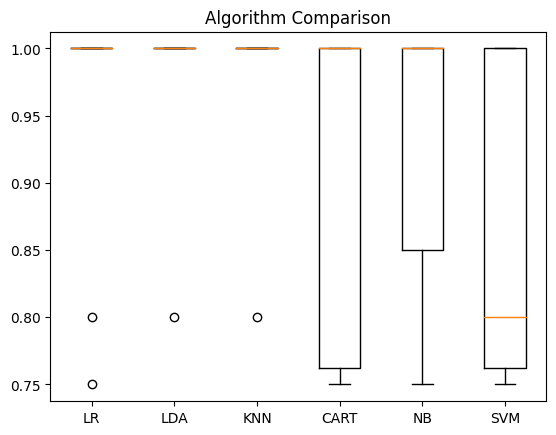

In [ ]:
plt.boxplot(results_pca, labels=names_pca)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
print(results)
print(results_pca)

[array([0.8 , 1.  , 1.  , 0.8 , 0.75, 1.  , 1.  , 1.  , 0.75, 0.75]), array([0.8 , 0.8 , 1.  , 1.  , 0.75, 1.  , 1.  , 0.75, 1.  , 0.75]), array([1. , 0.8, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]), array([1.  , 0.6 , 1.  , 0.8 , 0.75, 1.  , 0.75, 1.  , 0.75, 0.75]), array([0.8 , 1.  , 1.  , 0.8 , 1.  , 0.75, 0.75, 0.75, 1.  , 1.  ]), array([0.8 , 0.8 , 1.  , 1.  , 0.75, 1.  , 0.75, 1.  , 0.75, 1.  ])]
[array([1.  , 1.  , 1.  , 0.8 , 1.  , 1.  , 1.  , 1.  , 0.75, 1.  ]), array([1. , 0.8, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]), array([1. , 0.8, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]), array([1.  , 0.8 , 1.  , 1.  , 1.  , 1.  , 0.75, 0.75, 0.75, 1.  ]), array([1.  , 1.  , 1.  , 0.8 , 0.75, 1.  , 1.  , 0.75, 1.  , 1.  ]), array([0.8 , 1.  , 0.8 , 0.8 , 0.75, 1.  , 0.75, 0.75, 1.  , 1.  ])]


In [ ]:
confusion_matrices = []
for i in range(len(models)):
  model = models[i][1]
  model.fit(x_trained_fitted, Y_train)
  predictions = model.predict(x_tested_pca)
  classification_report(Y_test, predictions)
  matrix = confusion_matrix(Y_test, predictions)
  print(matrix)
  #confusion_matrices.append(matrix)

[[6 0]
 [0 5]]
[[6 0]
 [0 5]]
[[6 0]
 [1 4]]
[[5 1]
 [1 4]]
[[6 0]
 [2 3]]
[[4 2]
 [1 4]]


In [ ]:
plt.scatter(z[:35, 0], z[:35, 1], label='healthy', marker='o')
plt.scatter(z[35:, 0], z[35:, 1], label='diseased', marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Scatter Plot')
plt.figure()
plt.show()

NameError: ignored

NameError: ignored

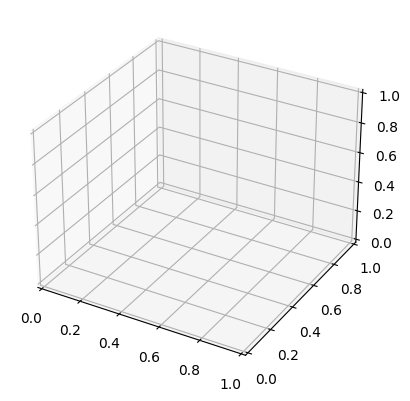

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.scatter(z[:35, 0], z[:35, 1], z[:35, 2], label='healthy', marker='o')
plt.scatter(z[35:, 0], z[35:, 1], z[35:, 2], label='diseased', marker='x')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.title('PCA Scatter Plot')
plt.show()
#print(z)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
scaler.fit(df_copy)
scaled = pca.transform(df_copy)
pca_copy = PCA(n_components = 18)
pca_copy.fit(scaled)
scaled_z = pca_copy.transform(scaled)
plt.plot(np.cumsum(pca_copy.explained_variance_ratio_ * 100))
plt.xlabel("Number of Features")
plt.ylabel("Explained Variance (%)")
plt.title("Retained Information vs. Number of Features Being Tested")

NameError: ignored

In [ ]:
array = df.values
print(array)
X = array[:,0:18]
y = array[:,18]
print(X, y)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)

[[ 2.06485010e-06  2.64222155e-01 -1.46840388e-01 ...  4.87000000e+01
   1.00700000e+02  0.00000000e+00]
 [-4.24779376e-04  3.49692395e-01 -6.03335390e-02 ...  4.85555556e+01
   1.06444444e+02  0.00000000e+00]
 [-2.07370663e-05  3.44289162e-01 -7.54469131e-02 ...  4.47777778e+01
   1.06900000e+02  0.00000000e+00]
 ...
 [ 7.44500602e-05  3.82084802e-01 -7.43655550e-02 ...  5.66250000e+01
   1.03875000e+02  1.00000000e+00]
 [ 5.18585468e-04  3.57990261e-01 -5.65807696e-02 ...  5.38750000e+01
   1.06666667e+02  1.00000000e+00]
 [ 2.53939057e-04  2.55349044e-01 -1.26784634e-01 ...  5.77500000e+01
   9.46250000e+01  1.00000000e+00]]
[[ 2.06485010e-06  2.64222155e-01 -1.46840388e-01  5.22176162e-02
   1.06429134e+01  1.24721913e+01  9.70000000e+02  9.33333333e+02
   1.00000000e+01  3.53614899e-05  4.07856690e-03  1.15339227e+02
   4.11408677e-03  6.29923017e+01  2.14000000e+01  4.29000000e+01
   4.87000000e+01  1.00700000e+02]
 [-4.24779376e-04  3.49692395e-01 -6.03335390e-02  5.70120735e-02